1) (a) Create and print out a scatter plot of this dataset, eruption time versus waiting time.

   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85
Data shape: (272, 2)


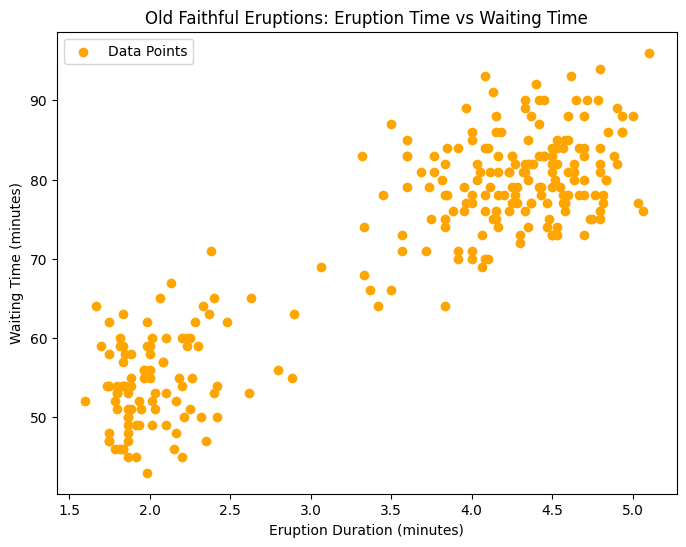

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset (adjust the path if needed)
df = pd.read_csv("faithful.csv")

# Print the first few rows and the shape for verification
print(df.head())
print("Data shape:", df.shape)

# Create the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c='orange', label="Data Points")
plt.xlabel("Eruption Duration (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.title("Old Faithful Eruptions: Eruption Time vs Waiting Time")
plt.legend()
plt.show()


b) 

Based on the plot I see there are two possible clusters. One on the lower left and the other one on top right. The lower left ranges from 1.5-3 minutes of Eruption Duration and 40-70 minutes of Waiting Time. The top right ranges from 3.5-5 Eruption Duration and 70-90 Waiting Time. 

c)

Hierarchical clustering algorithm works like this:
- Start with each data point as its own cluster.
- Compute all pairwise distances between clusters (at first, between individual points).
- Find the two closest clusters and merge them.
- Recompute distances between this new cluster and all the others.
- Repeat “find-and-merge” until you’re down to one big cluster (or until you’ve reached however many clusters you want).
- Finally, you can “cut” the resulting tree (dendrogram) at the level that gives you your chosen number of clusters.

Appropriateness for this dataset:
Yes, hierarchical clustering can be applied to the Old Faithful dataset, as it helps explore how data groups naturally without needing to predefine the number of clusters. However, since the scatter plot shows two well-separated clusters, hierarchical clustering may be unnecessarily complex and computationally heavier. A simpler method like k-means, which is faster and well-suited for clear, compact clusters, would be more efficient for this dataset. Therefore, while hierarchical clustering is possible, k-means is a better choice here.

2) (a) K-Means Algorithm Implementation from Scratch

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('faithful.csv')

X = df[['eruptions', 'waiting']].values

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def kmeans(X, k=2, max_iters=100, tol=1e-4):
    np.random.seed(42)  # For reproducibility
    centroids = X[np.random.choice(len(X), k, replace=False)]
    objective_values = []

    for iteration in range(max_iters):
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)

        new_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroids[i]
                                  for i, cluster in enumerate(clusters)])

        J = 0
        for i, cluster in enumerate(clusters):
            for point in cluster:
                J += euclidean_distance(point, centroids[i]) ** 2
        objective_values.append(J)

        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    labels = np.zeros(len(X))
    for idx, point in enumerate(X):
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        labels[idx] = np.argmin(distances)

    return centroids, labels, objective_values


(b) Scatter Plot of Final Clustering with Cluster Centers

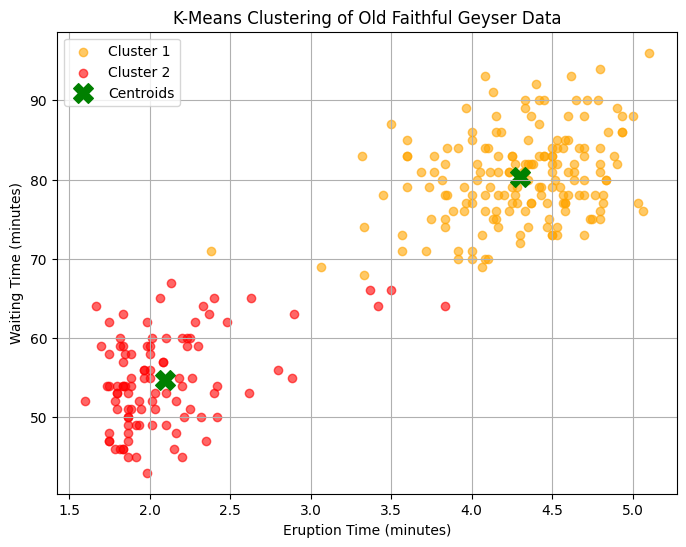

In [3]:
centroids, labels, objective_values = kmeans(X, k=2)

plt.figure(figsize=(8, 6))
colors = ['orange', 'red']
for i in range(2):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label=f'Cluster {i+1}', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='green', marker='X', s=200, label='Centroids')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.title('K-Means Clustering of Old Faithful Geyser Data')
plt.legend()
plt.grid(True)
plt.show()


(c) A plot of the k-means objective function versus iterations of the algorithm

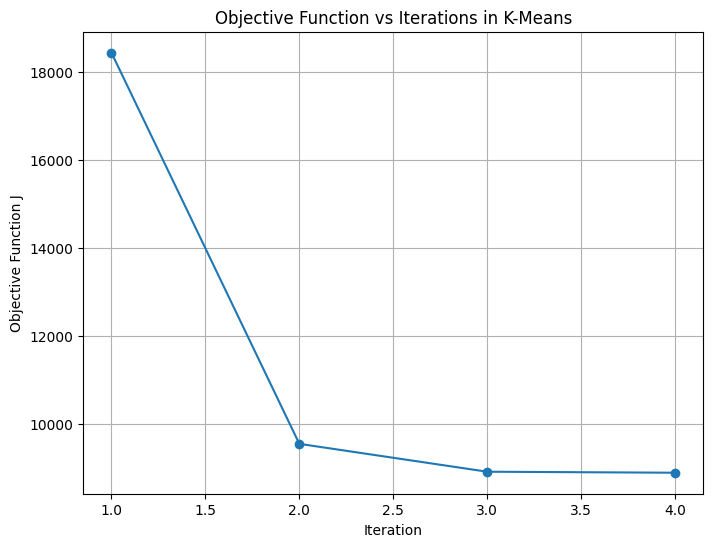

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(objective_values)+1), objective_values, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Objective Function J')
plt.title('Objective Function vs Iterations in K-Means')
plt.grid(True)
plt.show()
